In [3]:
import pandas as pd
import numpy as np
import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [8]:
data = pd.read_csv('project1_data.csv', delimiter=';', index_col='id')

In [9]:
data.head()

,weight,height,sex,cats,age,income,savings,single,place,expenses
id,,,,,,,,,,
1,84.99,171.72,1,2,55,1213.10,480.45,0,1,326.33
2,91.06,175.83,1,2,41,1300.14,192.14,0,2,409.24
3,88.30,175.34,1,1,42,1203.19,643.34,0,3,274.26
4,84.51,167.64,1,1,50,1231.13,303.35,0,1,374.86
5,85.72,171.62,1,2,53,892.02,424.99,0,2,248.24


In [10]:
data.describe()

,weight,height,sex,cats,age,income,savings,single,place,expenses
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,89.477667,177.277267,1.488889,2.035556,50.613333,1592.097733,620.030667,0.364444,2.046667,308.810178
std,3.600803,7.918122,0.500433,1.372195,6.847808,940.605357,415.998130,0.481810,0.721944,126.167312
min,77.890000,158.670000,1.000000,0.000000,34.000000,691.730000,85.800000,0.000000,1.000000,-391.650000
25%,86.830000,170.755000,1.000000,1.000000,46.000000,1051.787500,387.605000,0.000000,2.000000,236.567500
50%,89.420000,176.635000,1.000000,2.000000,51.000000,1281.810000,560.415000,0.000000,2.000000,336.990000
75%,92.030000,183.935000,2.000000,3.000000,55.000000,1799.727500,733.565000,1.000000,3.000000,407.227500
max,99.720000,195.790000,2.000000,5.000000,73.000000,7089.020000,3200.920000,1.000000,3.000000,486.790000


We first divide the columns into quantitative and qualitative. The latter ones are sex, single and place. The sex and single columns have two possible values indicating whether a person is a female/has a partner. The place variable describes where the person lives and the values are not indicating anything more than that.

In [20]:
quantitative_cols = [
    'weight',
    'height',
    'cats',
    'age',
    'income',
    'savings',
    'expenses'
]
qualitative_cols = [
    'sex',
    'single',
    'place'
]

We do not have any missing values.

In [16]:
data.isna().sum()

weight      0
height      0
sex         0
cats        0
age         0
income      0
savings     0
single      0
place       0
expenses    0
dtype: int64

In [22]:
data[quantitative_cols].describe()

,weight,height,cats,age,income,savings,expenses
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,89.477667,177.277267,2.035556,50.613333,1592.097733,620.030667,308.810178
std,3.600803,7.918122,1.372195,6.847808,940.605357,415.998130,126.167312
min,77.890000,158.670000,0.000000,34.000000,691.730000,85.800000,-391.650000
25%,86.830000,170.755000,1.000000,46.000000,1051.787500,387.605000,236.567500
50%,89.420000,176.635000,2.000000,51.000000,1281.810000,560.415000,336.990000
75%,92.030000,183.935000,3.000000,55.000000,1799.727500,733.565000,407.227500
max,99.720000,195.790000,5.000000,73.000000,7089.020000,3200.920000,486.790000


In [27]:
for col in qualitative_cols:
    display(data[col].value_counts())

sex
1    230
2    220
Name: count, dtype: int64

single
0    286
1    164
Name: count, dtype: int64

place
2    215
3    128
1    107
Name: count, dtype: int64

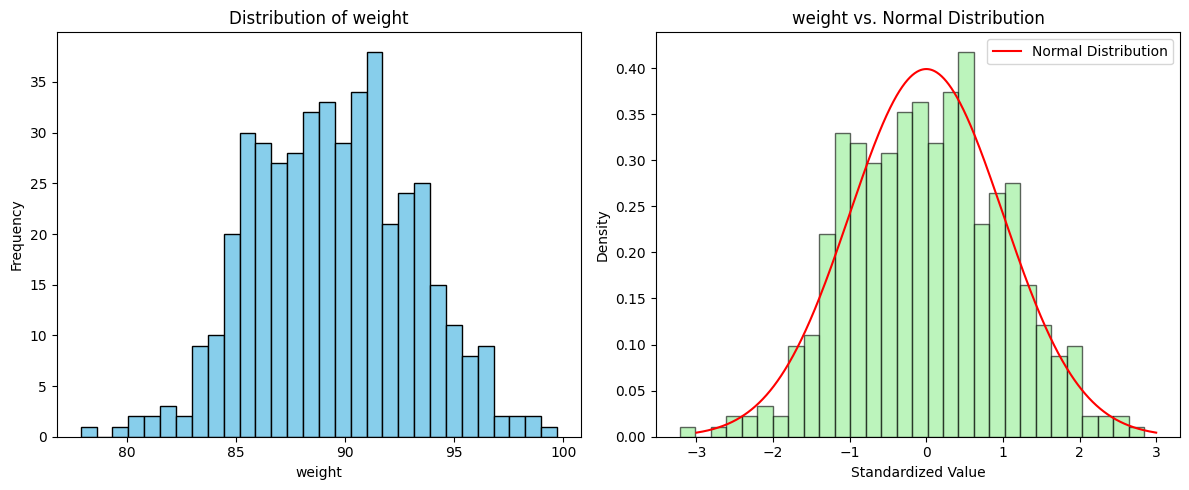

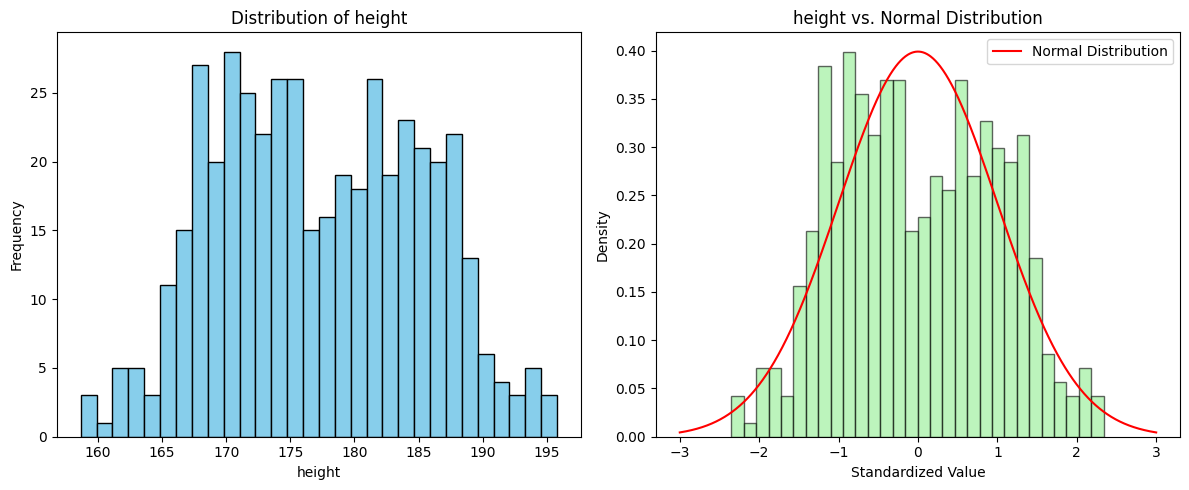

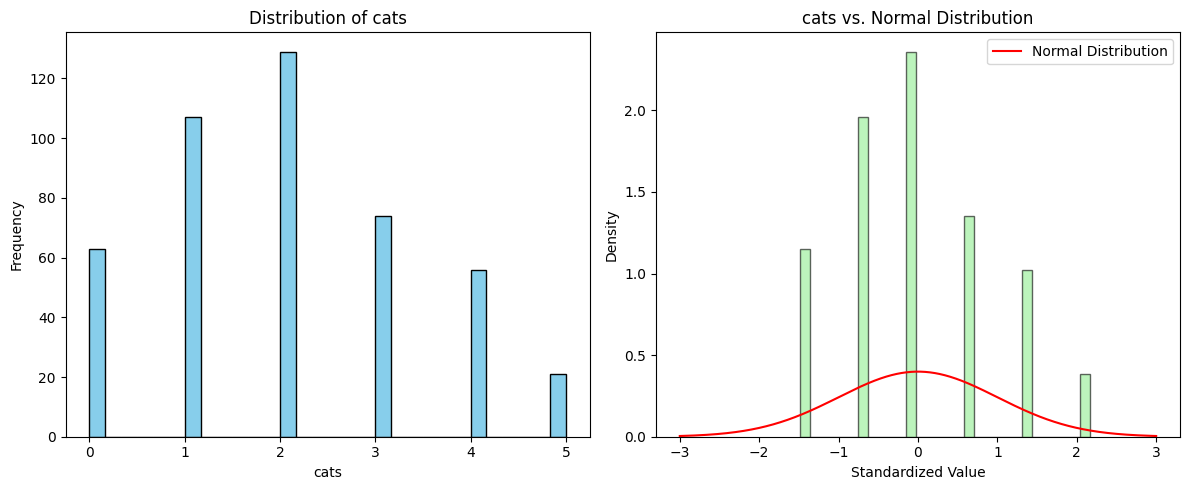

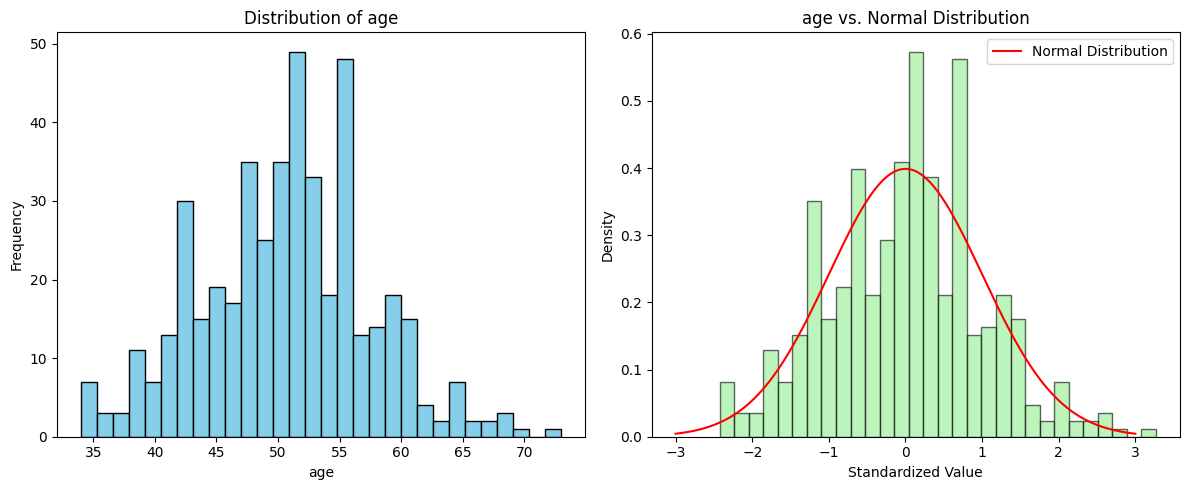

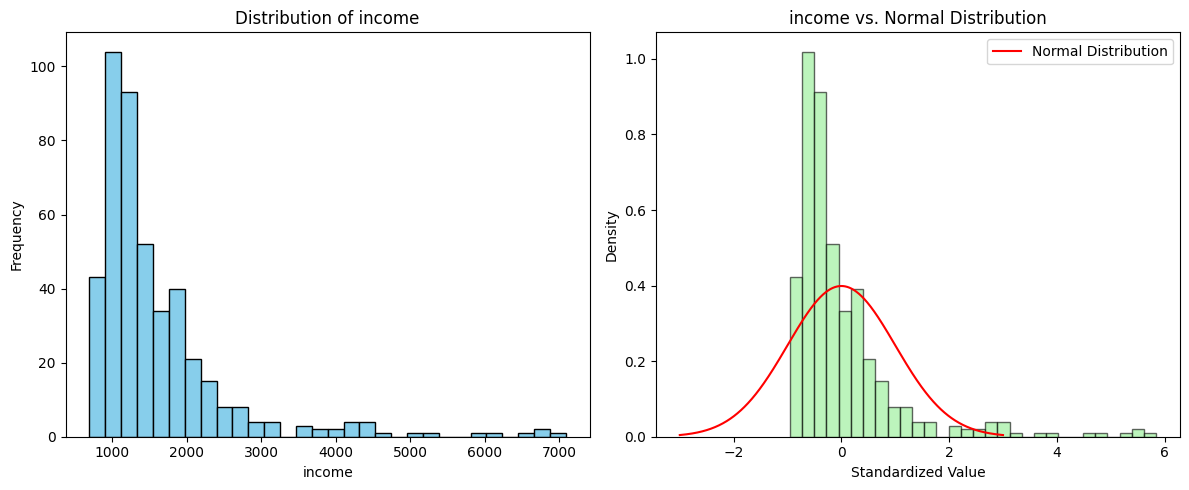

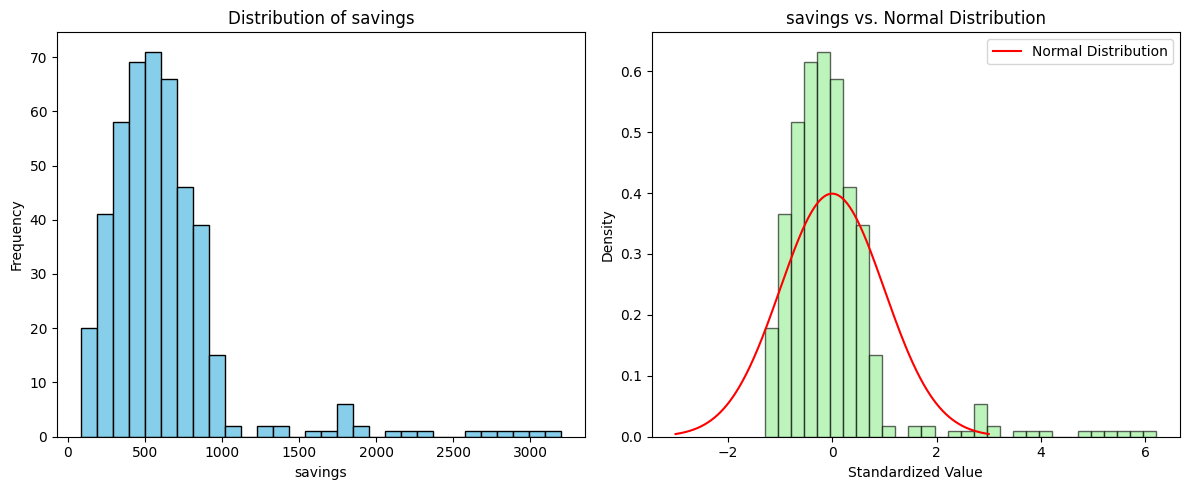

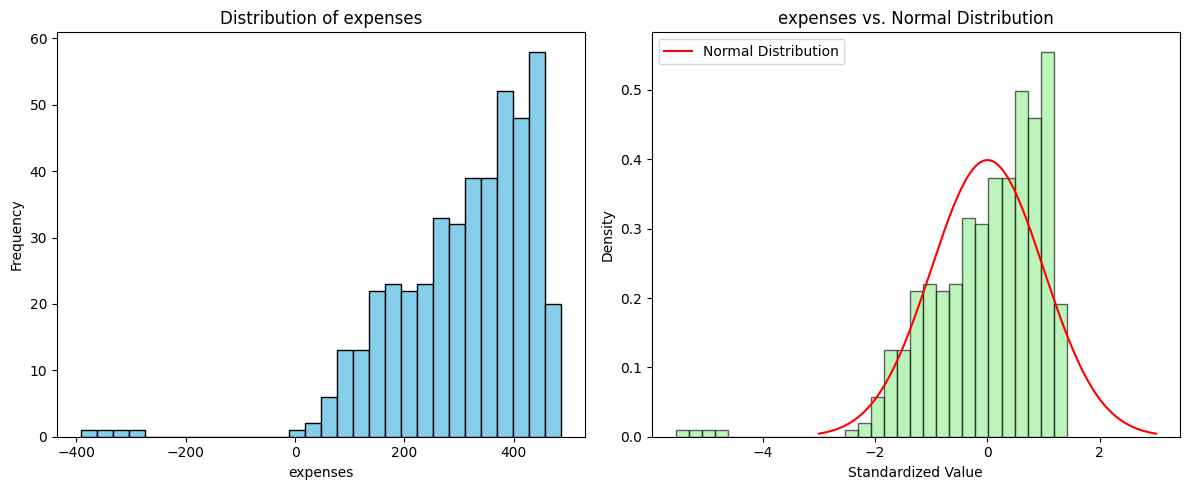

In [36]:
from scipy.stats import norm

for col in quantitative_cols:
    fig, ax = plt.subplots(1, 2, figsize=(12, 5))  
    ax[0].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    ax[0].set_title(f'Distribution of {col}')
    ax[0].set_xlabel(col)
    ax[0].set_ylabel('Frequency')

    normalized_data = (data[col] - data[col].mean()) / data[col].std()
    ax[1].hist(normalized_data, bins=30, density=True, alpha=0.6, color='lightgreen', edgecolor='black')
    x = np.linspace(-3, 3, 1000)  
    ax[1].plot(x, norm.pdf(x), 'r-', label='Normal Distribution')  
    ax[1].set_title(f'{col} vs. Normal Distribution')
    ax[1].set_xlabel('Standardized Value')
    ax[1].set_ylabel('Density')
    ax[1].legend()

    plt.tight_layout()
    plt.show()

In [37]:
from scipy.stats import kstest

for col in quantitative_cols:
    # Standardize the column
    standardized_data = (data[col] - data[col].mean()) / data[col].std()
    
    # Perform the Kolmogorov-Smirnov test
    ks_stat, p_value = kstest(standardized_data, 'norm')
    
    # Print the results
    print(f"Kolmogorov-Smirnov Test for {col}:")
    print(f"  KS Statistic: {ks_stat:.4f}")
    print(f"  P-value: {p_value:.4e}")
    if p_value < 0.05:
        print("  Result: Reject the null hypothesis (data does not follow a normal distribution)\n")
    else:
        print("  Result: Fail to reject the null hypothesis (data may follow a normal distribution)\n")


Kolmogorov-Smirnov Test for weight:
  KS Statistic: 0.0293
  P-value: 8.2278e-01
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for height:
  KS Statistic: 0.0585
  P-value: 8.8410e-02
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for cats:
  KS Statistic: 0.1748
  P-value: 1.7113e-12
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test for age:
  KS Statistic: 0.0532
  P-value: 1.5095e-01
  Result: Fail to reject the null hypothesis (data may follow a normal distribution)

Kolmogorov-Smirnov Test for income:
  KS Statistic: 0.1849
  P-value: 6.0812e-14
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-Smirnov Test for savings:
  KS Statistic: 0.1542
  P-value: 8.3221e-10
  Result: Reject the null hypothesis (data does not follow a normal distribution)

Kolmogorov-